<a href="https://colab.research.google.com/github/anabdck/automatic-equalizer/blob/master/atividade04_FIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade 04 - DSP22108
### Aluna Ana Cláudia Banderchuk


In [0]:
#/gdrive/My Drive/Engenharia Eletrônica/- 8˚ Fase -/DSP22108/Atividade 3/audio-teste-ruido1.wav
import numpy as np # para usar funções que lidam com vetores
import matplotlib.pyplot as plt # para desenho
import matplotlib.pyplot as plt
import scipy.fftpack


import numpy
import pylab
import scipy as sp
import wave
import struct
import time
import math
import numpy

from scipy import signal
from IPython.display import (Audio, display, clear_output) # widget com os botões de play, volume e download


### Abrir o arquivo

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


48000


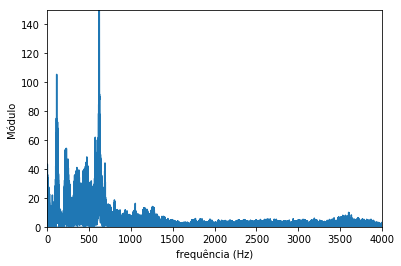

48000


In [5]:
# Abrir o arquivo
som = wave.open('/gdrive/My Drive/Engenharia Eletrônica/- 8˚ Fase -/DSP22108/Atividade 3/audio-teste-ruido1_48k.wav', 'r')
fs = som.getframerate()
N = som.getnframes()
n = N
frames = som.readframes(N)
data = struct.unpack('<' + str(som.getnframes()) +'h', frames)
t = np.arange(start = 0, stop = N/fs, step= 1/fs, dtype=np.float)

print(fs)

display(Audio(data, rate=fs, autoplay=False)) 

# Plotar audio na frequência
fft = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), 1/fs)
plt.plot(freq, (2/n)*np.abs(fft))
plt.xlabel('frequência (Hz)')
plt.ylabel('Módulo')
plt.xlim(0, 4e3)
plt.ylim(0, 150)
plt.show()

print(fs)

### Análise da Frequência do Ruído

In [6]:
mfft = (2/n)*np.abs(fft)
for i in range(int((len(mfft)-1)/2)):
  if(mfft[i] > 10e3):
    print('a frequência de', freq[i], 'possui móludo de', mfft[i])
    freq_central = freq[i]

a frequência de 620.4387433663479 possui móludo de 10788.631978492145


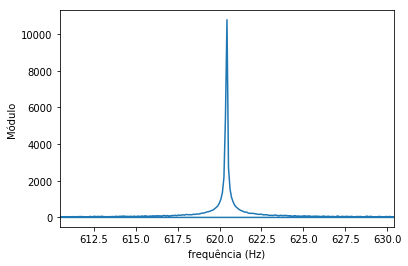

In [7]:
plt.plot(freq, (2/n)*np.abs(fft))
plt.xlabel('frequência (Hz)')
plt.ylabel('Módulo')
plt.xlim(freq_central - 10, freq_central + 10)
#plt.ylim(0, 150)
plt.show()

### Construção do Filtro FIR Rejeita-Faixa

A construção do Filtro Rejeita-Faixa será feita 

```

```



#### Definição do Filtro
f1: Frequência de Corte Inferior

f2: Frequência de Corte Superior

M: Ordem do Filtro, número de TAPS

In [0]:
M = 801

delta = 150;
f1 = freq_central - delta;
f2 = freq_central + delta;

f = np.array([f1, f2])
fn = 2 * f / fs


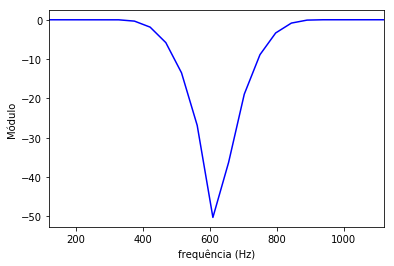

In [10]:
taps = signal.firwin(M, fn, window = 'blackman', pass_zero = 'bandstop')

w, h = sp.signal.freqz(taps, 1)

plt.plot((w/(np.pi*2))*(fs), 20 * np.log10(abs(h)), 'b')
plt.xlabel('frequência (Hz)')
plt.ylabel('Módulo')
plt.xlim(freq_central-500, freq_central+500)
#plt.ylim(0, 150)
plt.show()

filtered_data = signal.lfilter(taps, 1.0, data)
display(Audio(filtered_data, rate=fs, autoplay=False))

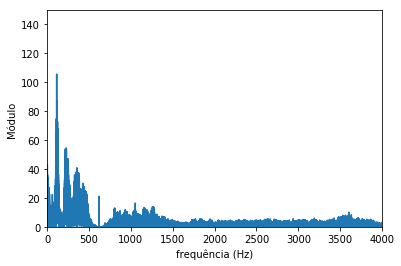

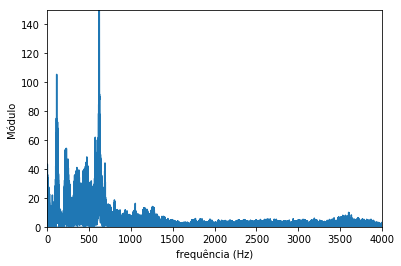

In [11]:
# Plotar audio na frequência
fft = np.fft.fft(filtered_data)
freq = np.fft.fftfreq(len(filtered_data), 1/fs)
plt.plot(freq, (2/n)*np.abs(fft))
plt.xlabel('frequência (Hz)')
plt.ylabel('Módulo')
plt.xlim(0, 4e3)
plt.ylim(0, 150)
plt.show()

fft = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), 1/fs)
plt.plot(freq, (2/n)*np.abs(fft))
plt.xlabel('frequência (Hz)')
plt.ylabel('Módulo')
plt.xlim(0, 4e3)
plt.ylim(0, 150)
plt.show()

In [0]:
taps_ponto_fixo = np.zeros(M)

for i in range(M):
  taps_ponto_fixo[i] = int(taps[i]*pow(2,15))

In [13]:

#c = np.savetxt('file.txt', taps, delimiter =', ') 

ponto_flutuante = np.array2string(taps, formatter={'float_kind':lambda x: "%.10f" % x}, separator='\n', suppress_small=True)
ponto_fixo = np.array2string(taps_ponto_fixo, separator='\n', suppress_small=True)

# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.

# P O N T O   F L U T U A N T E
uploaded = drive.CreateFile({'title': 'coeficientes_ponto_flutuante.txt'})
uploaded.SetContentString(ponto_flutuante)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# P O N T O   F I X O   Q 1 5
uploaded = drive.CreateFile({'title': 'coeficientes_ponto_fixo.txt'})
uploaded.SetContentString(ponto_fixo)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1h4V5u0Cq2pIzCATj89PLBOoxYZMOgTvd
Uploaded file with ID 1B2qcZNOHBjctUApHVIHqctAwVM-n-raE
